<a href="https://colab.research.google.com/github/jinsooya/emba/blob/main/05_configuring_llm_parameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

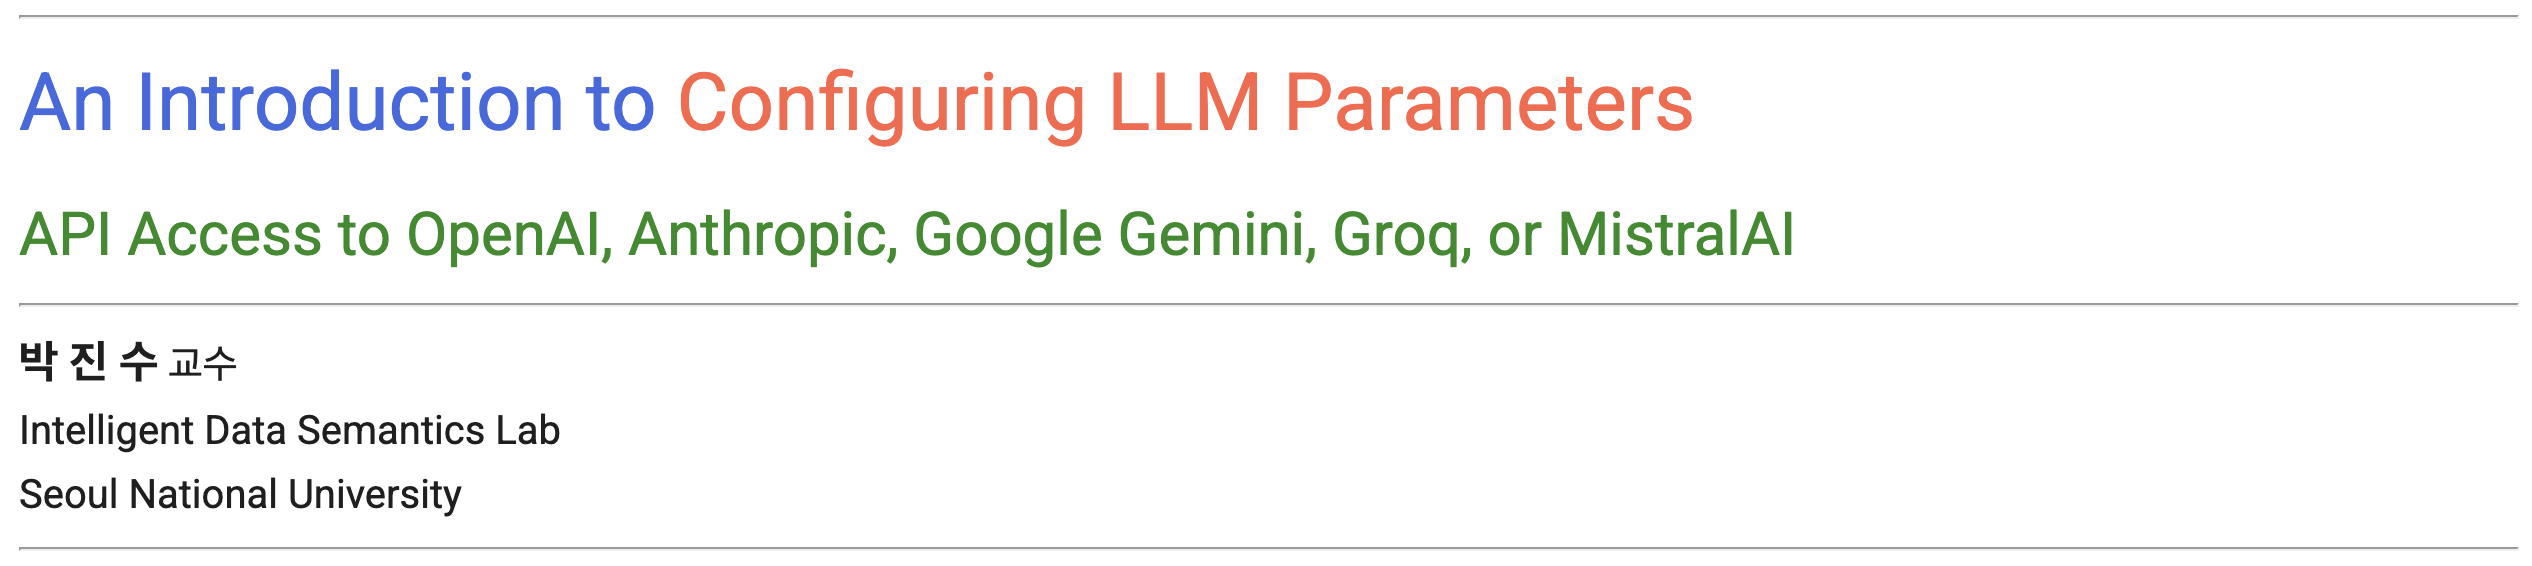

- - -    

- 본 자료는 강의를 위한 목적으로 제작되었습니다.
- 본 자료에 대한 사전 허가를 받지 않는 배포를 금지합니다.
- 본 자료를 강의나 다른 목적으로 활용하고자 하시는 경우 꼭 아래 이메일 주소로 연락주세요.
- 연락처 : [jinsoo@snu.ac.kr](jinsoo@snu.ac.kr)

- - -

**<font size='+2'>목차**

>[패키지 설치 및 API 설정](#scrollTo=M_ZVjZ45zfHj)

>>[Setting Up the MistralAI API](#scrollTo=p1YmqIgtgYpK)

>>[Setting Up the Groq API](#scrollTo=F-eMvvKEgYpL)

>>[Setting Up the Google API](#scrollTo=OLZyjGUVgYpL)

>>[Setting Up the Anthropic API](#scrollTo=9_ESx0XEgYpP)

>>[Setting Up the OpenAI API](#scrollTo=H5CXeJ2ogYpP)

>[도우미 함수](#scrollTo=gdzvu749qPfV)

>[기본 예시](#scrollTo=mnI5gs_sgYpQ)

>[파라미터 설정](#scrollTo=1S6kcSQrAnmE)

>>[창의성 조절 : temperature](#scrollTo=oH_YVcY8AnmE)

>>[샘플링 : top_p](#scrollTo=IZqIVkfbAnmI)

>>[답변 모드 : response_format](#scrollTo=Cp9BYJPOkeNu)

>>>[json_object](#scrollTo=tFvHAMRCAnmX)

>>>[json_schema](#scrollTo=op66fKFqAnmY)

>>[재현 가능한 응답 : seed](#scrollTo=P8c0u4vsAnmm)

>>[텍스트 스트리밍 : stream](#scrollTo=y2BYrhLTAnmu)



# 패키지 설치 및 API 설정

In [ ]:
!python -m pip install --quiet litellm mistralai groq google-genai anthropic openai
print('--- Job Completed', '-' * 55, '\n')

## Setting Up the MistralAI API

**<font size='+1'>MistralAI API Key 발급</font>**
- API Key 발급 및 MistralAI에 대한 내용은 아래 자료를 참고한다.
  + https://drive.google.com/file/d/1eiRVg-hTGhN2SrJz0R7Qsn0ZS6Pw7HHd/view?usp=sharing
- API Key를 Colab의 보안 비밀에 'MISTRAL_API_KEY'라는 이름으로 등록한다.

**<font color='red' size='+1'>[주의] 아래 방법 중 <u>하나만 선택하</u>여 실행해야 합니다.</font>**

In [ ]:
# 방법 1 - 저장한 시스템 환경 변수를 불러온다.
import os
from google.colab import userdata
from mistralai import Mistral

os.environ['MISTRAL_API_KEY'] = userdata.get('MISTRAL_API_KEY')
client = Mistral(api_key=os.getenv('MISTRAL_API_KEY'))

In [ ]:
# 방법 2 - API Key를 입력한다.
import os, getpass
from google.colab import userdata
from mistralai import Mistral

os.environ['MISTRAL_API_KEY'] = getpass.getpass('Enter Your MistralAI API Key: ')
client = Mistral(api_key=os.getenv('MISTRAL_API_KEY'))

**<font size='+1'>사용 가능한 모델 확인</font>**

In [ ]:
# API를 호출하고 사용 가능한 모델을 출력한다.
models = client.models.list()

available_models = [model.id for model in models.data]

for model in sorted(available_models):
    print(model)

## Setting Up the Groq API

**<font size='+1'>Groq API Key 발급</font>**
- API Key 발급 및 Groq에 대한 내용은 아래 자료를 참고한다.
  + https://drive.google.com/file/d/1E267hPCwahSbaKWVeCPQp2ksW8T9VsTG/view?usp=sharing
- API Key를 Colab의 보안 비밀에 'GROQ_API_KEY'라는 이름으로 등록한다.

**<font color='red' size='+1'>[주의] 아래 방법 중 <u>하나만 선택하</u>여 실행해야 합니다.</font>**

In [ ]:
# 방법 1 - 저장한 시스템 환경 변수를 불러온다.
import os
from google.colab import userdata
from groq import Groq

os.environ['GROQ_API_KEY'] = userdata.get('GROQ_API_KEY')
client = Groq()

In [ ]:
# 방법 2 - API Key를 입력한다.
import os, getpass
from groq import Groq

os.environ['GROQ_API_KEY'] = getpass.getpass('Enter Your Groq API Key: ')
client = Groq()

**<font size='+1'>사용 가능한 모델 확인</font>**

In [ ]:
# API를 호출하고 사용 가능한 모델을 출력한다.
models = client.models.list()
# models = groq_client.models.list()

available_models = [model.id for model in models.data]

for model in sorted(available_models):
    print(model)

## Setting Up the Google API

**<font size='+1'>Google Gemini API Key 발급</font>**
- API Key 발급 및 Google Gemini 대한 내용은 아래 자료를 참고한다.
  + https://drive.google.com/file/d/1YLy4B4RkD6Y3HnpScpKd0trPZxKvUsXa/view?usp=sharing
- API Key를 Colab의 보안 비밀에 'GOOGLE_API_KEY'라는 이름으로 등록한다.

**<font color='red' size='+1'>[주의] 아래 방법 중 <u>하나만 선택하</u>여 실행해야 합니다.</font>**

In [ ]:
# 방법 1 - 저장한 시스템 환경 변수를 불러온다.
import os
from google.colab import userdata
from google import genai

os.environ['GEMINI_API_KEY'] = userdata.get('GOOGLE_API_KEY')
client = genai.Client()

In [ ]:
# 방법 2 - API Key를 입력한다.
import os, getpass
from google import genai

os.environ['GEMINI_API_KEY'] = getpass.getpass('Enter Your Google Gemini API Key: ')
client = genai.Client()

**<font size='+1'>사용 가능한 모델 확인</font>**

In [ ]:
# API를 호출하고 사용 가능한 모델을 출력한다.

models = client.models.list()

available_models = [model.name[7:] for model in models]

for model in sorted(available_models):
    print(model)

## Setting Up the Anthropic API

**<font size='+1'>Anthropic API Key 발급</font>**
- API Key 발급 및 Anthropic 대한 내용은 아래 자료를 참고한다.
  + https://drive.google.com/file/d/1u9q-0_gCc6wmRAXNctQj8ApLRhOtYYpX/view?usp=sharing
- API Key를 Colab의 보안 비밀에 'ANTHROPIC_API_KEY'라는 이름으로 등록한다.

**<font color='red' size='+1'>[주의] 아래 방법 중 <u>하나만 선택하</u>여 실행해야 합니다.</font>**

In [ ]:
# 방법 1 - 저장한 시스템 환경 변수를 불러온다.
import os
from google.colab import userdata
from anthropic import Anthropic

os.environ['ANTHROPIC_API_KEY'] = userdata.get('ANTHROPIC_API_KEY')
client = Anthropic()

In [ ]:
# 방법 2 - API Key를 입력한다.
import os, getpass
from anthropic import Anthropic

os.environ['ANTHROPIC_API_KEY'] = getpass.getpass('Enter Your Anthropic API Key: ')
client = Anthropic()

**<font size='+1'>사용 가능한 모델 확인</font>**

In [ ]:
# API를 호출하고 사용 가능한 모델을 출력한다.
models = client.models.list()

available_models = [model.id for model in models.data]

for model in sorted(available_models):
    print(model)

## Setting Up the OpenAI API

**<font size='+1'>OpenAI API Key 발급</font>**
- API Key 발급 및 OpenAI에 대한 내용은 아래 자료를 참고한다.
  + https://drive.google.com/file/d/122mEaoTYAYOPehBfChfOkNLHbZrDge3C/view?usp=sharing
- API Key를 Colab의 보안 비밀에 'OPENAI_API_KEY'라는 이름으로 등록한다.

**<font color='red' size='+1'>[주의] 아래 방법 중 <u>하나만 선택하</u>여 실행해야 합니다.</font>**

In [ ]:
# 방법 1 - 저장한 시스템 환경 변수를 불러온다.
import os
from google.colab import userdata
from openai import OpenAI

os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')
client = OpenAI()

In [ ]:
# 방법 2 - API Key를 입력한다.
import os, getpass
from openai import OpenAI

os.environ['OPENAI_API_KEY'] = getpass.getpass('Enter Your OpenAI API Key: ')
client = OpenAI()

**<font size='+1'>사용 가능한 모델 확인</font>**

In [ ]:
# API를 호출하고 사용 가능한 모델을 출력한다.
models = client.models.list()

available_models = [model.id for model in models.data]

for model in sorted(available_models):
    print(model)

# 도우미 함수

In [ ]:
# Colab의 출력 결과를 자동으로 줄바꿈한다.
from IPython.display import HTML, display

def set_css():
    display(HTML('''
    <style>
        pre {
            white-space: pre-wrap;
        }
    </style>
    '''))

get_ipython().events.register('pre_run_cell', set_css)

In [ ]:
# --- 이 실습에서 사용할 함수를 정의한다.
from litellm import completion

# 본인이 사용하는 모델(model)로 도우미 함수를 설정하세요.
# 예시) 'mistral/mistral-small-latest' | 'groq/openai/gpt-oss-20b'
#      'gemini/gemini-2.5-flash' | 'anthropic/claude-sonnet-4-20250514'
#      'openai/gpt-5-mini' (caution) GPT-5 does not support 'temperature', use 'gpt-4o-mini' to use 'temperature'
def get_response(instruction, user_message, model='groq/openai/gpt-oss-20b', **kwargs):
    """
    대화형 AI 모델로부터 단일 응답만 받아오는 함수다.

    Args:
        instruction (Optional[str]): 대화의 시스템 또는 개발자 지침 역할을 하는 문자열
            LLM에게 특정 행동 양식을 알려줄 때 사용한다. '' 또는 None이면 아무런 시스템 메시지도 전달하지 않는다.
        user_message (Optional[str]): 사용자가 보내는 메시지로 LLM이 답변을 생성하는 데 사용한다.
        model (str): 호출할 LLM 모델의 이름
        **kwargs: litellm.completion()에 전달할 추가 파라미터
            (예: temperature, max_tokens, stop, top_p 등)

    Returns:
       str: 모델이 생성한 응답 문자열
    """
    # 모델에 전달할 메시지 리스트 구성
    messages = []

    if instruction:
        messages.append({'role': 'developer', 'content': instruction})

    # 일부 모델(e.g., Anthropic)은 사용자 메시지가 반드시 필요하므로 빈 문자열이라도 추가한다.
    messages.append({'role': 'user', 'content': [{'type': 'text', 'text': user_message or ''}]})

    # litellm의 completion 함수를 호출해서 응답 생성
    response = completion(model=model, messages=messages, **kwargs)

    # 생성한 AI 응답을 가져온다.
    ai_message = response.choices[0].message.content

    # 모델 응답을 반환한다.
    return ai_message

# 기본 예시

- - -
**OpenAI Chat Playground**
- https://platform.openai.com/playground?mode=chat
- - -

- - -
**Groq Playground**
- https://console.groq.com/playground
- - -

- - -
**Google AI Studio**
- https://aistudio.google.com
- - -

- - -
**이 실습에서는 영어 사용을 권장한다.**
- - -

In [ ]:
# --- WITHOUT system instruction
from litellm import completion

user_message = '옛날 옛적에'
response = completion(
    model='gemini/gemini-2.5-flash',  # your model of choice ('openai/gpt-4o-mini' | ...)
    messages=[{
        'role': 'user',
        'content': [{'type': 'text', 'text': user_message}]
    }]
)
response

In [ ]:
print(response.choices[0].message.content)

In [ ]:
# --- WITH system instruction
instruction  = '사용자가 입력한 메시지를 연결해서 한 문장으로 완성하세요.'
user_message = '옛날 옛적에'
response = get_response(instruction, user_message)
print(response)

# 파라미터 설정

## 창의성 조절 : *temperature*

In [ ]:
# --- temperature=0
instruction  = '사용자가 입력한 메시지를 연결해서 한 문장으로 완성하세요.'
user_message = '내가 가장 좋아하는 음식은'
for _ in range(5):
    response = get_response(instruction, user_message, temperature=0)
    print(response)

In [ ]:
# --- temperature=1.5
instruction  = '사용자가 입력한 메시지를 연결해서 한 문장으로 완성하세요.'
user_message = '내가 가장 좋아하는 음식은'
for _ in range(5):
    response = get_response(instruction, user_message, temperature=1.5)
    print(response)

## 샘플링 : *top_p*

In [ ]:
# --- top_p=0.1
instruction  = '사용자가 입력한 메시지를 연결해서 한 문장으로 완성하세요.'
user_message = '나는 오늘 아침에'
for _ in range(5):
    response = get_response(instruction, user_message, top_p=0.1)
    print(response)

In [ ]:
# --- top_p=0.9
instruction  = '사용자가 입력한 메시지를 연결해서 한 문장으로 완성하세요.'
user_message = '나는 오늘 아침에'
for _ in range(5):
    response = get_response(instruction, user_message, top_p=0.9)
    print(response)

## 답변 모드 : *response_format*

In [ ]:
# --- response_format={'type': 'text'} <- default response_format parameter
instruction  = None
user_message = '누가 파이썬을 만들었나요? 언제 만들었나요?'
response = get_response(
    instruction,
    user_message,
    # response_format={'type': 'text'}  # default
)
print(response)

### **json_object**

In [ ]:
# --- response_format={'type': 'json_object'} enables JSON mode,
#     which ensures the message the model generates is valid JSON.
# --- WITH system instructions to produce JSON
instruction  = '당신은 JSON을 출력하도록 설계된 똑똑한 어시스턴트입니다.'
user_message = '누가 파이썬을 만들었나요? 언제 만들었나요?'
response = get_response(
    instruction,
    user_message,
    response_format={'type': 'json_object'}
)
print(response)

In [ ]:
# --- response_format={'type': 'json_object'}
# --- WITHOUT system instructions to produce JSON
instruction  = None
user_message = '누가 파이썬을 만들었나요? 언제 만들었나요?'
response = get_response(
    instruction,
    user_message,
    response_format={'type': 'json_object'}
)
print(response)

### **json_schema**

In [ ]:
# --- response_format={'type': 'json_schmema', 'json_schema': {...}} enables
#     structured outputs which ensures the model will match your supplied JSON schema.
# --- WITHOUT system instructions to produce JSON
#     response_format={'type': 'json_object'}와는 달리 오류가 나지 않는다.
from pydantic import BaseModel

class LanguageCreator(BaseModel):
    creator: str
    year_created: int

instruction  = None
user_message = '누가 파이썬을 만들었나요? 언제 만들었나요?'
response = get_response(
    instruction,
    user_message,
    response_format=LanguageCreator
)
print(response)

## 재현 가능한 응답 : *seed*

In [ ]:
# --- WITHOUT seed
instruction  = '당신은 짧은 이야기를 만들어내는 작가입니다.'
user_message = '행복한 하루에 대해 말해주세요.'
for _ in range(3):
    response = get_response(instruction, user_message)
    print(response)
    print('-' * 75)

In [ ]:
# --- WITH seed
instruction  = '당신은 짧은 이야기를 만들어내는 작가입니다.'
user_message = '행복한 하루에 대해 말해주세요.'
for _ in range(3):
    response = get_response(instruction, user_message, seed=11)
    print(response)
    print('-' * 75)

## 텍스트 스트리밍 : *stream*

In [ ]:
# --- stream=False
instruction  = None
user_message = '행복한 하루에 대해 말해주세요.'
response = get_response(instruction, user_message)
print(response)

In [ ]:
# --- stream=True
from litellm import completion

user_message = '행복한 하루에 대해 말해주세요.'
response = completion(
    model='groq/openai/gpt-oss-20b',
    # or
    # model='gemini/gemini-2.5-flash',
    messages=[{
        'role': 'user',
        'content': [{'type': 'text', 'text': user_message}]
    }],
    stream=True
)

for chunk in response:
    print(chunk.choices[0].delta.content or '', end='', flush=True)

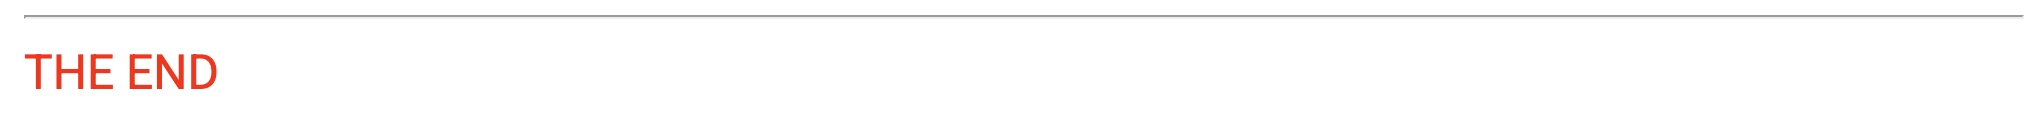